<h1> 3.1 Linear Regression</h1>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from numpy import hstack

## Read data from CSV file

In [2]:
gold_data=pd.read_csv('GOLD.csv')

In [3]:
gold_data.shape

(512, 9)

In [4]:
gold_data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [5]:
gold_data=gold_data.drop_duplicates(subset=['Date'], keep=False)

In [6]:
gold_data.shape

(512, 9)

##### No duplicate dates are present.

In [7]:
gold_data.isna().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

##### Pred feature contains 101 NaN values which will be found using Linear Regression later on.

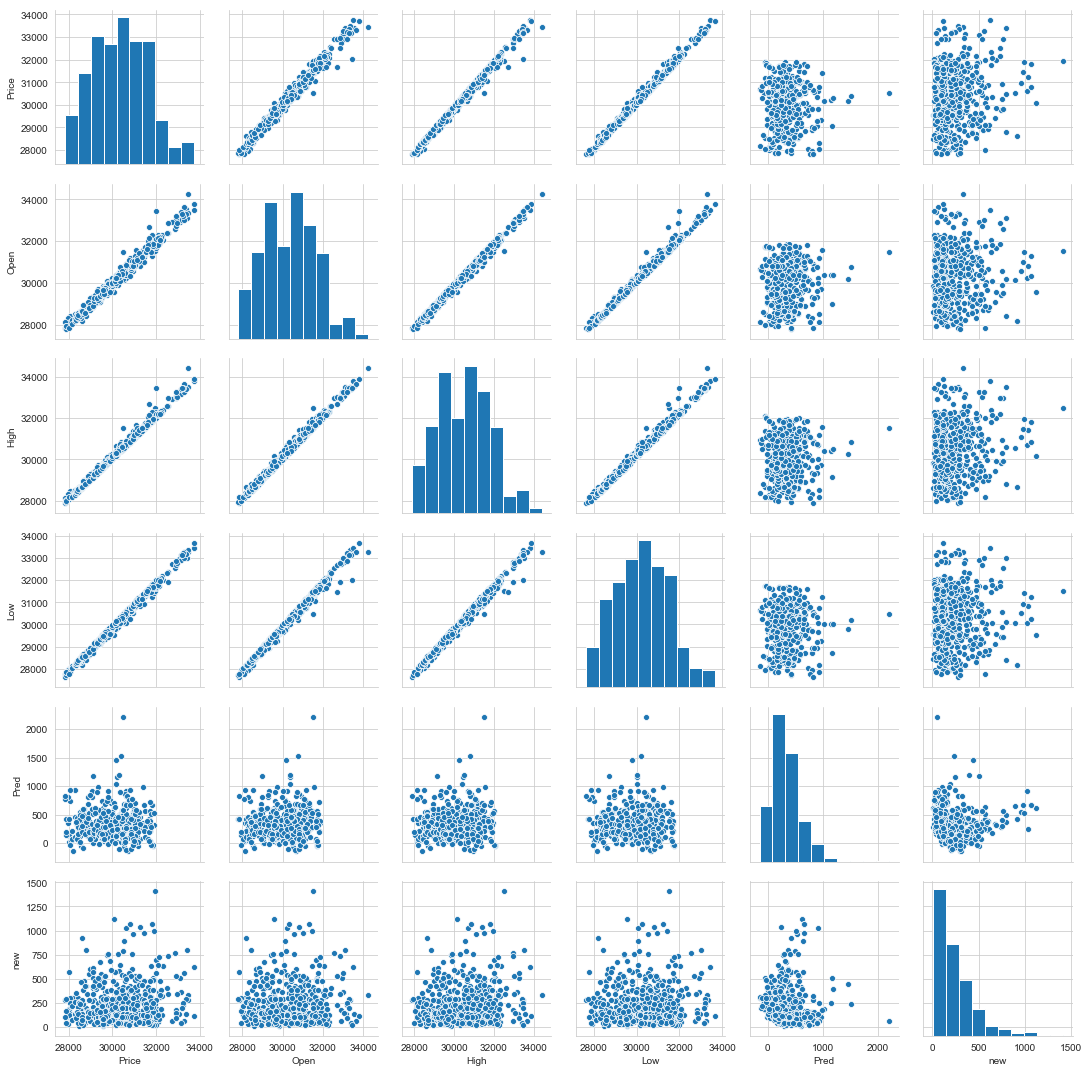

In [8]:
plt.close();
sns.set_style("whitegrid")
sns.pairplot(gold_data)
plt.show()

##### All the price features have high positive correlation.

## Linear Regression on two columns 'new' and 'Pred'

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
from sklearn.preprocessing import PolynomialFeatures 

### Linear Regression on 'Pred' column

### Hyperparameter Tuning on degree of coefficients

In [11]:
degree=[1,2,3]

In [13]:
data=gold_data[:410]#Taking non-empty rows of Pred feature to train model

In [14]:
train_data=data[:300]
test_data=data[300:]

In [15]:
train_error=[]
test_error=[]
for i in degree:
    poly = PolynomialFeatures(degree = i) 
    X_poly=poly.fit_transform(train_data[['Price','Open','High','Low']])
    poly.fit(X_poly,train_data['Pred'])
    l2=LinearRegression()
    l2.fit(X_poly,train_data['Pred'])
    y_pred_train=l2.predict(X_poly)
    train_error.append(np.sqrt(mean_squared_error(train_data['Pred'],y_pred_train)))
    
    X_poly=poly.fit_transform(test_data[['Price','Open','High','Low']])
    poly.fit(X_poly,test_data['Pred'])
    y_pred_test=l2.predict(X_poly)
    test_error.append(np.sqrt(mean_squared_error(test_data['Pred'],y_pred_test)))

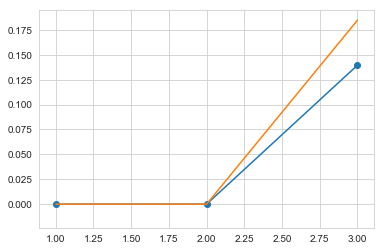

In [16]:
plt.scatter(degree,train_error)
plt.plot(degree,train_error)
plt.plot(degree,test_error)
plt.show()

##### Since for degrees 1 and 2 losses are minimum, So we will choose one of these. But which one to choose? Choosing 2 over 1 will increase complexity of model as polynomial terms will be present in the hypothesis. So best degree is 1.

##### So this is linear combination of prices

### Train Model

In [17]:
best_degree=1

In [18]:
l=LinearRegression()
l.fit(data[['Price','Open','High','Low']],data['Pred'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Coefficients of Inputs

In [19]:
print("The coefficients of inputs are",l.coef_)

The coefficients of inputs are [ 2.  3. -1. -4.]


### Root Mean Square Error

In [20]:
y_pred_rmse=l.predict(data[['Price','Open','High','Low']])

In [21]:
rmse=np.sqrt(mean_squared_error(data['Pred'],y_pred_rmse))

In [22]:
rmse

6.901217270393371e-12

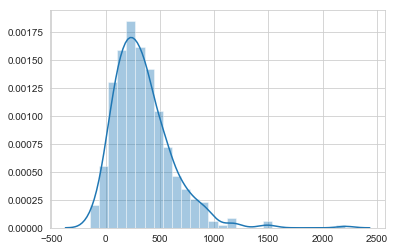

In [23]:
sns.distplot(y_pred_rmse)
plt.show()

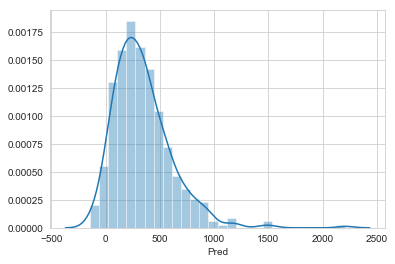

In [24]:
sns.distplot(data['Pred'])
plt.show()

##### The pdfs of Actual and Predicted Values are almost similar. So the model gives high performance.

### Filling Empty Rows of 'Pred' feature in new column 'PredNew'

In [25]:
y_pred=l.predict(gold_data[['Price','Open','High','Low']])

In [26]:
gold_data['PredNew']=y_pred

### Linear Regression on 'new' column

### Hyperparameter Tuning on degree of coefficients

In [27]:
degree=[1,2,3]

In [28]:
train_data=gold_data[:400]

In [29]:
test_data=gold_data[400:]

In [30]:
train_error=[]
test_error=[]
for i in degree:
    poly = PolynomialFeatures(degree = i) 
    X_poly=poly.fit_transform(train_data[['Price','Open','High','Low']])
    poly.fit(X_poly,train_data['new'])
    l2=LinearRegression()
    l2.fit(X_poly,train_data['new'])
    y_pred_train=l2.predict(X_poly)
    train_error.append(np.sqrt(mean_squared_error(train_data['new'],y_pred_train)))
    
    X_poly=poly.fit_transform(test_data[['Price','Open','High','Low']])
    poly.fit(X_poly,test_data['new'])
    y_pred_test=l2.predict(X_poly)
    test_error.append(np.sqrt(mean_squared_error(test_data['new'],y_pred_test)))

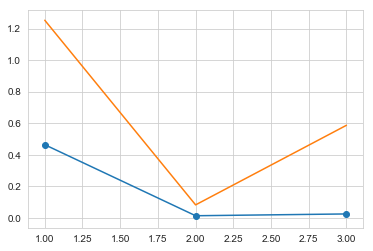

In [31]:
plt.scatter(degree,train_error)
plt.plot(degree,train_error)
plt.plot(degree,test_error)
plt.show()

In [32]:
best_degree=2

##### Best degree is 2 i.e. quadratic polynomial as the loss is minimum for degree =2.

##### So this is a polynomial function of prices.

### Model Train

In [33]:
poly = PolynomialFeatures(degree = 2) 
X_poly=poly.fit_transform(gold_data[['Price','Open','High','Low']])
poly.fit(X_poly,gold_data['new'])
l=LinearRegression()
l.fit(X_poly,gold_data['new'])
y_pred=l.predict(X_poly)

### Coefficients of Inputs

In [34]:
print("The coefficients are",l.coef_)

The coefficients are [ 0.00000000e+00  1.01115624e+00 -1.00037224e+00  1.00486611e+00
 -1.01570564e+00  1.42618904e-07 -1.13978921e-06  3.28502578e-05
 -3.23583571e-05 -5.60859963e-07  8.43118856e-07  1.43268607e-06
 -1.83868866e-07 -3.34871909e-05  3.24630231e-05]


### Root Mean Square Error

In [35]:
rmse=np.sqrt(mean_squared_error(gold_data['new'],y_pred))

In [36]:
rmse

0.01840810948630634

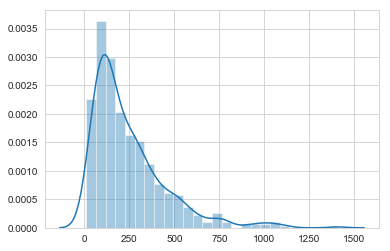

In [37]:
sns.distplot(y_pred)
plt.show()

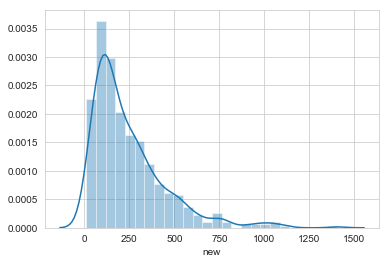

In [38]:
sns.distplot(gold_data['new'])
plt.show()

##### The pdfs of Actual and Predicted Values are almost similar. So there is very less error.

<h1>3.2 Beta Calculation</h1>

##### Nifty and Raymond Stocks

In [39]:
nifty=pd.read_csv('Nifty50.csv')

In [40]:
raymond=pd.read_csv('RAYMOND.csv')

In [41]:
nifty.isna().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Shares Traded        0
Turnover (Rs. Cr)    0
dtype: int64

In [42]:
raymond.isna().sum()

Symbol                    0
Series                    0
Date                      0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
dtype: int64

So there are no null values in both the tables.

In [43]:
nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [44]:
raymond.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RAYMOND,EQ,15-May-2017,763.45,765.00,779.00,757.05,773.9,772.80,770.09,292498,2.252491e+08,9033,55467,18.96
1,RAYMOND,EQ,16-May-2017,772.80,773.45,801.45,768.10,783.5,785.00,788.89,823956,6.500070e+08,18238,179377,21.77
2,RAYMOND,EQ,17-May-2017,785.00,786.00,804.95,778.40,785.5,783.65,792.72,598094,4.741212e+08,13968,127637,21.34
3,RAYMOND,EQ,18-May-2017,783.65,779.35,779.95,740.20,744.0,746.95,762.57,319834,2.438956e+08,7713,92200,28.83
4,RAYMOND,EQ,19-May-2017,746.95,748.00,767.50,714.00,722.0,723.10,740.30,561346,4.155619e+08,13328,137648,24.52


### Daily Beta Value for last 3 months

In [45]:
raymond.tail(63).shape #As 3 Months have 63 weekdays/working days.

(63, 15)

In [46]:
close_prices_daily = pd.concat([raymond['Close Price'].tail(63), nifty['Close'].tail(63)], axis=1)

In [47]:
close_prices_daily.columns = ['Raymond', 'NIFTY']

In [48]:
close_prices_daily.shape

(63, 2)

In [49]:
close_prices_daily.head()

,Raymond,NIFTY
431,711.10,11062.45
432,653.70,11069.40
433,687.55,10943.60
434,687.75,10888.80
435,695.10,10831.40


In [50]:
close_prices_daily_change = close_prices_daily.pct_change(fill_method='ffill')*100

In [51]:
close_prices_daily_change.head()

,Raymond,NIFTY
431,NaN,NaN
432,-8.072001,0.062825
433,5.178216,-1.136466
434,0.029089,-0.500749
435,1.068702,-0.527147


In [52]:
close_prices_daily_change = close_prices_daily_change.dropna(axis=0)

In [53]:
close_prices_daily_change.head()

,Raymond,NIFTY
432,-8.072001,0.062825
433,5.178216,-1.136466
434,0.029089,-0.500749
435,1.068702,-0.527147
436,0.474752,-0.348524


In [54]:
close_prices_daily_change.shape

(62, 2)

In [55]:
import statsmodels.api as sm

In [56]:
X = close_prices_daily_change['NIFTY']
y = close_prices_daily_change['Raymond']

In [57]:
X1 = sm.add_constant(X)

In [58]:
model = sm.OLS(y, X1)

In [59]:
results = model.fit()

In [60]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Raymond   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.629
Date:                Thu, 04 Jul 2019   Prob (F-statistic):              0.207
Time:                        00:46:52   Log-Likelihood:                -133.10
No. Observations:                  62   AIC:                             270.2
Df Residuals:                      60   BIC:                             274.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.267      0.608      0.5

## Monthly Beta Value

In [61]:
close_prices= pd.concat([raymond['Date'],raymond['Close Price'],nifty['Close']],axis=1)

In [62]:
close_prices.columns = ['Date','Raymond', 'NIFTY']

In [63]:
close_prices.head()

,Date,Raymond,NIFTY
0,15-May-2017,772.80,9445.40
1,16-May-2017,785.00,9512.25
2,17-May-2017,783.65,9525.75
3,18-May-2017,746.95,9429.45
4,19-May-2017,723.10,9427.90


In [64]:
close_prices.tail()

,Date,Raymond,NIFTY
489,07-May-2019,808.95,11497.90
490,08-May-2019,807.10,11359.45
491,09-May-2019,805.30,11301.80
492,10-May-2019,804.40,11278.90
493,13-May-2019,779.35,11148.20


In [65]:
close_prices.dtypes

Date        object
Raymond    float64
NIFTY      float64
dtype: object

In [66]:
close_prices['Date'] =  pd.to_datetime(close_prices['Date'])

In [67]:
close_prices['month_year'] = pd.to_datetime(close_prices['Date']).dt.to_period('M')

In [68]:
grouped_data=close_prices.groupby(['month_year']).mean()

In [69]:
grouped_data

,Raymond,NIFTY
month_year,,
2017-05,721.065385,9498.557692
2017-06,725.011905,9606.954762
2017-07,798.369048,9850.119048
2017-08,755.857143,9901.183333
2017-09,856.076190,9977.916667
2017-10,865.817500,10138.677500
2017-11,961.559091,10324.754545
2017-12,992.337500,10322.262500
2018-01,1093.925000,10771.154545


In [70]:
close_prices_monthly_change = grouped_data.pct_change(fill_method='ffill')*100

In [71]:
close_prices_monthly_change = close_prices_monthly_change.dropna(axis=0)

In [72]:
close_prices_monthly_change.shape

(24, 2)

In [73]:
import statsmodels.api as sm

In [74]:
X = close_prices_monthly_change['NIFTY']
y = close_prices_monthly_change['Raymond']

In [75]:
X1 = sm.add_constant(X)

In [76]:
model = sm.OLS(y, X1)

In [77]:
results = model.fit()

In [78]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Raymond   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     8.119
Date:                Thu, 04 Jul 2019   Prob (F-statistic):            0.00933
Time:                        00:47:32   Log-Likelihood:                -83.517
No. Observations:                  24   AIC:                             171.0
Df Residuals:                      22   BIC:                             173.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6541      1.750     -0.374      0.7

## Interpretation of a Beta result

- Zero indicates no correlation with NIFTY or some chosen benchmark.
- One indicates a stock has the equally sensitive as the market
- Greater than one indicates a stock that’s more sensitive than NIFTY
- Lesser than one is less sensitive than NIFTY
- 1.8 is 80% more sensitive than NIFTY

- β < -1 => Asset moves in the opposite direction, and in a greater amount than the negative of the benchmark
- -1 < β < 0 => Asset movement is in the opposite direction of the benchmark
- β = 0 => Asset movement is uncorrelated to the benchmark
- 0 < β < 1 => Asset moves in the same direction, but in a lesser amount than the benchmark
- β = 1 => Asset moves in the same direction and in the same amount as the benchmark
- β > 1 => Asset moves in the same direction, but in a greater amount than the benchmark

# Daily Beta for last 3 months:

##### β=0.4995  (0<β<1)

##### Beta is less than one and greater than zero which means Raymond Stocks are moving in the same direction as NIFTY but at a slower rate.

# Monthly Beta Value:

##### beta=1.7660  (β>1)

##### Beta greater than one which means Raymond Stocks are moving in the same direction as NIFTY and at a higher rate.